<a href="https://colab.research.google.com/github/DataParadox/iTrustBD/blob/main/Codes/iTrustBD_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/PG/CSE6413 Network Science/Project Works'

/content/drive/My Drive/PG/CSE6413 Network Science/Project Works


# Dataset

In [3]:
import pandas as pd
nodeTable = pd.read_csv('./Datasets/Epoch_Out/node_table_0.csv')

In [4]:
nodeTable

,Id,Class,timeset,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,...,Authority,Hub,pageranks,componentnumber,strongcompnum,modularity_class,stat_inf_class,clustering,eigencentrality,behavior
0,7604,-1,NaN,73,21,94,-628,110,-518,6,...,0.080527,0.025972,NaN,0,506,2,39,0.097339,0.388011,-1
1,5342,-1,NaN,39,80,119,0,-249,-249,6,...,0.048157,0.049823,NaN,0,506,13,32,0.040049,0.241042,-1
2,7602,-1,NaN,17,13,30,-150,10,-140,7,...,0.027852,0.021469,NaN,0,506,2,19,0.338768,0.142756,-1
3,7594,-1,NaN,8,6,14,-61,-60,-121,7,...,0.008680,0.007923,NaN,0,506,13,93,0.138889,0.047984,-1
4,708,-1,NaN,7,24,31,12,-128,-116,7,...,0.007487,0.011672,NaN,0,506,13,44,0.035000,0.035902,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,6,1,NaN,139,148,287,388,252,640,5,...,0.122799,0.122040,NaN,0,506,13,77,0.052608,0.633059,1
3779,4,1,NaN,201,215,416,588,476,1064,5,...,0.104260,0.110217,NaN,0,506,2,18,0.026903,0.568198,1
3780,3,1,NaN,251,243,494,610,493,1103,6,...,0.177256,0.161742,NaN,0,506,13,38,0.035077,0.900561,1
3781,2,1,NaN,205,195,400,735,397,1132,5,...,0.173652,0.160447,NaN,0,506,8,13,0.048873,0.869056,1


In [33]:
mean = nodeTable['Degree'].mean()

# Degree Distribution

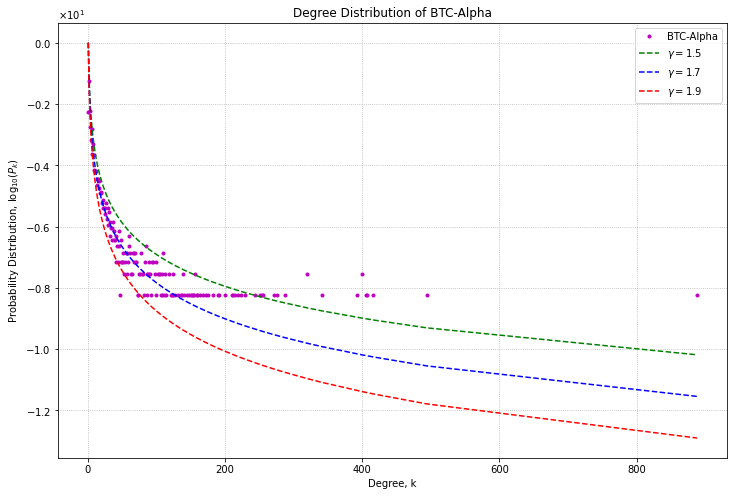

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure(figsize = (12, 8))
dist = nodeTable['Degree'].value_counts(normalize=True).sort_index()
plt.title('Degree Distribution of BTC-Alpha')
plt.ylabel('Probability Distribution, $\log_{10}(P_{k})$')
plt.xlabel('Degree, k')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=True)
plt.plot(dist.index, list(math.log(x) for x in dist.values), 'm.', label = 'BTC-Alpha')

gamma = 1.5
plt.plot(dist.index, list(-gamma*math.log(x) for x in dist.index), 'g--', label = '$\gamma = 1.5$')
gamma = 1.7
plt.plot(dist.index, list(-gamma*math.log(x) for x in dist.index), 'b--', label = '$\gamma = 1.7$')
gamma = 1.9
plt.plot(dist.index, list(-gamma*math.log(x) for x in dist.index), 'r--', label = '$\gamma = 1.9$')

plt.legend()
plt.grid(True, linestyle =':')
plt.savefig('degree_distributions.png', transparent=True)
plt.show()

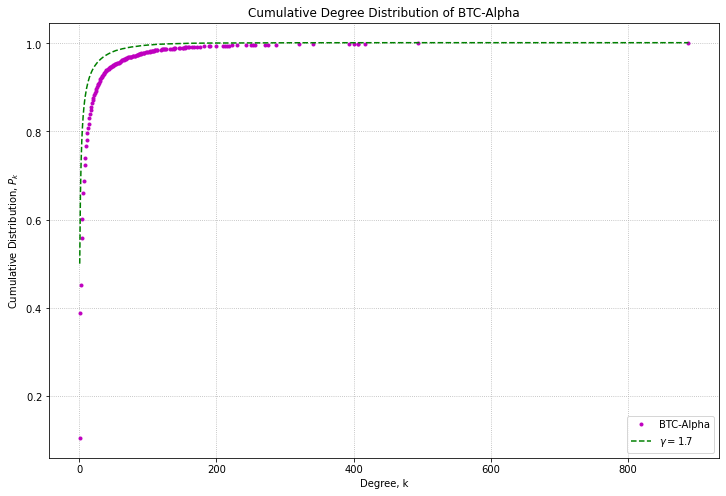

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

fig = plt.figure(figsize = (12, 8))
dist = nodeTable['Degree'].value_counts(normalize=True).sort_index()
dist = dist.cumsum()

plt.title('Cumulative Degree Distribution of BTC-Alpha')
plt.ylabel('Cumulative Distribution, $P_{k}$')
plt.xlabel('Degree, k')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=True)
plt.plot(dist.index, list(x for x in dist.values), 'm.', label = 'BTC-Alpha')

gamma = 1.7
y = pd.DataFrame(x**(-gamma) for x in dist.index)
y = y.cumsum()
plt.plot(dist.index, y.values*0.5, 'g--', label = '$\gamma = 1.7$')

plt.legend()
plt.grid(True, linestyle =':')
plt.savefig('cumulative_degree_distributions.png', transparent=True)
plt.show()